# Criando os Nomes

In [200]:
import pandas as pd 

In [201]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [202]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))
nomes_m

Quantidade de nomes: 400


,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [203]:
frames = [nomes_f, nomes_m]


In [204]:
nomes = pd.concat(frames)['nome'].to_frame()


In [205]:
nomes.sample(5)

,nome
59,ISABEL
172,REBECA
130,JUNIOR
70,JOAQUIM
171,VALDEMIR


# Incluindo ID dos Alunos

In [206]:
import numpy as np
np.random.seed(123)

In [207]:
total_alunos = nomes.shape[0]
total_alunos

400

In [208]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [209]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [210]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [211]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,@servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [212]:
# nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes['email'] = nomes.nome.str.lower() + nomes.dominio

In [213]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [214]:
!pip3 install html5lib
!pip3 install lxml

In [215]:
import html5lib

In [216]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [217]:
type(cursos)

list

In [218]:
cursos = cursos[0]

In [219]:
type(cursos)

pandas.core.frame.DataFrame

In [220]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [221]:
cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'}, inplace = True)

In [222]:
cursos.head(5)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [223]:
cursos['id'] = cursos.index + 1

In [224]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [225]:
cursos.set_index('id', inplace = True)

In [226]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [227]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,@servicodoemail.com,rebeca@servicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,@servicodoemail.com,joaquim@servicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


# Matriculando os alunos nos cursos

In [242]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [243]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
128,JOICE,357,@servicodoemail.com,joice@servicodoemail.com,1
22,ANDRE,311,@dominiodoemail.com.br,andre@dominiodoemail.com.br,3
80,EMERSON,373,@dominiodoemail.com.br,emerson@dominiodoemail.com.br,1
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br,1
193,KAUAN,84,@servicodoemail.com,kauan@servicodoemail.com,1


In [244]:
nomes.matriculas.describe()

count    400.000000
mean       1.997500
std        1.377402
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       14.000000
Name: matriculas, dtype: float64

In [245]:
import seaborn as sns 

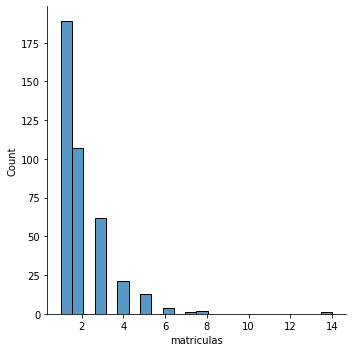

In [246]:
sns.displot(nomes.matriculas)

In [247]:
nomes.matriculas.value_counts()

1     189
2     107
3      62
4      21
5      13
6       4
8       2
14      1
7       1
Name: matriculas, dtype: int64

In [251]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
111,TAMIRES,121,@dominiodoemail.com.br,tamires@dominiodoemail.com.br,4
63,ERICA,228,@servicodoemail.com,erica@servicodoemail.com,2
50,VINICIUS,183,@servicodoemail.com,vinicius@servicodoemail.com,1
54,REGINA,281,@dominiodoemail.com.br,regina@dominiodoemail.com.br,3
113,ROBERTA,143,@dominiodoemail.com.br,roberta@dominiodoemail.com.br,1


# Selecionando cursos

In [252]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
7,LUCAS,29,@servicodoemail.com,lucas@servicodoemail.com,2
178,DENILSON,335,@servicodoemail.com,denilson@servicodoemail.com,1
15,BRUNO,293,@dominiodoemail.com.br,bruno@dominiodoemail.com.br,1


In [253]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [254]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [255]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,10
2,235,1
3,43,6
4,304,19


In [260]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,61,Lógica de programação
3,49,C# para Web
4,42,Ruby on Rails
5,37,Cursos de Python
6,85,PHP com MySql
7,46,.NET para web
8,11,Novas integrações com Java
9,18,TDD com Java
10,41,Código limpo com C#


In [261]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
27,LUANA,240,@servicodoemail.com,luana@servicodoemail.com,1
24,FABIO,400,@servicodoemail.com,fabio@servicodoemail.com,4
156,VALDEMAR,119,@dominiodoemail.com.br,valdemar@dominiodoemail.com.br,4


In [262]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [263]:
matriculas.head()

,id_aluno,id_curso
0,235,6
1,235,10
2,235,1
3,43,6
4,304,19


In [264]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

In [265]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,61,Lógica de programação
3,49,C# para Web
4,42,Ruby on Rails
5,37,Cursos de Python
6,85,PHP com MySql


# Saída em diferentes formatos

In [266]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,61,Lógica de programação
3,49,C# para Web
4,42,Ruby on Rails
5,37,Cursos de Python
6,85,PHP com MySql


In [267]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [268]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,61,Lógica de programação
1,49,C# para Web
2,42,Ruby on Rails
3,37,Cursos de Python
4,85,PHP com MySql
5,46,.NET para web
6,11,Novas integrações com Java
7,18,TDD com Java
8,41,Código limpo com C#
9,27,Preparatório para certificação Java


In [269]:
matriculas_json = matriculas_por_curso.to_json()

In [270]:
matriculas_json

'{"quantidade_de_alunos":{"1":61,"3":49,"4":42,"5":37,"6":85,"7":46,"8":11,"9":18,"10":41,"11":27,"12":35,"13":101,"14":30,"15":65,"17":15,"18":68,"19":34,"20":34},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [271]:
matriculas_html = matriculas_por_curso.to_html()

In [273]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>61</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>3</th>
      <td>49</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>42</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>37</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>85</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>46</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>11</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>18</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>41</td>


# Criando o banco SQL 

In [274]:
!pip install sqlalchemy

In [275]:
from sqlalchemy import create_engine, MetaData, Table

In [276]:
engine = create_engine('sqlite:///:memory:')

In [277]:
engine

Engine(sqlite:///:memory:)

In [278]:
type(engine)

sqlalchemy.engine.base.Engine

In [281]:
matriculas_por_curso.to_sql('matriculas', engine)

In [283]:
print(engine.table_names())

['matriculas']


# Buscando no banco SQL

In [284]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [285]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,8,11,Novas integrações com Java
1,9,18,TDD com Java
2,17,15,Internet das coisas


In [301]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,61
1,C# para Web,49
2,Ruby on Rails,42
3,Cursos de Python,37
4,PHP com MySql,85
5,.NET para web,46
6,Novas integrações com Java,11
7,TDD com Java,18
8,Código limpo com C#,41
9,Preparatório para certificação Java,27


In [287]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [292]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 70')

In [293]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
4,PHP com MySql,85
11,Persistência com .NET,101


# Escrevendo no Banco

In [294]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [299]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dxs alunxs da Próxima Turma

In [304]:
matriculas_por_curso.head(25)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,61,Lógica de programação
3,49,C# para Web
4,42,Ruby on Rails
5,37,Cursos de Python
6,85,PHP com MySql
7,46,.NET para web
8,11,Novas integrações com Java
9,18,TDD com Java
10,41,Código limpo com C#


In [305]:
matriculas

,id_aluno,id_curso
0,235,6
1,235,10
2,235,1
3,43,6
4,304,19
...,...,...
794,323,8
795,323,5
796,383,10
797,366,20


In [306]:
id_curso = 12
proxima_turma = matriculas.query(f'id_curso == {id_curso}')
proxima_turma

,id_aluno,id_curso
9,343,12
13,288,12
18,92,12
23,218,12
90,281,12
100,193,12
101,193,12
139,203,12
154,126,12
158,126,12


In [307]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
31,RICARDO,336,@servicodoemail.com,ricardo@servicodoemail.com,1
9,ALINE,92,@dominiodoemail.com.br,aline@dominiodoemail.com.br,3
26,GUSTAVO,86,@servicodoemail.com,gustavo@servicodoemail.com,2


In [308]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
8,12,IRACI,@dominiodoemail.com.br,iraci@dominiodoemail.com.br,6
35,12,NILZA,@dominiodoemail.com.br,nilza@dominiodoemail.com.br,3
45,12,TERESINHA,@dominiodoemail.com.br,teresinha@dominiodoemail.com.br,4
50,12,LUCIANE,@dominiodoemail.com.br,luciane@dominiodoemail.com.br,2
51,12,MANUEL,@dominiodoemail.com.br,manuel@dominiodoemail.com.br,5
86,12,GUSTAVO,@servicodoemail.com,gustavo@servicodoemail.com,2
92,12,ALINE,@dominiodoemail.com.br,aline@dominiodoemail.com.br,3
126,12,FATIMA,@servicodoemail.com,fatima@servicodoemail.com,14
126,12,FATIMA,@servicodoemail.com,fatima@servicodoemail.com,14


In [310]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
8           IRACI
35          NILZA
45      TERESINHA
50        LUCIANE
51         MANUEL
86        GUSTAVO
92          ALINE
126        FATIMA
126        FATIMA
128       TAINARA
161       TATIANA
170     REGINALDO
182        NICOLE
193    ALESSANDRA
193    ALESSANDRA
198        CICERO
203       TATIANE
204       CLAUDIO
218        CAMILA
219       GABRIEL
225          YURI
230        CARLOS
236      LEONARDO
243     MARINALVA
257       ADILSON
281        REGINA
288      FERNANDA
289         IVONE
291        SIDNEI
326      EDMILSON
330         JORGE
343       ADRIANA
380          ELZA
385        MICHEL
389       LIDIANE
Name: nome, dtype: object

In [311]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
8,IRACI
35,NILZA
45,TERESINHA
50,LUCIANE
51,MANUEL
86,GUSTAVO
92,ALINE
126,FATIMA
126,FATIMA


In [318]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Hardware básico
Name: 12, dtype: object

In [319]:
nome_curso = nome_curso.nome_do_curso

In [320]:
nome_curso

'Hardware básico'

In [321]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [323]:
proxima_turma = proxima_turma.rename(columns = {'nome': f'alunos do curso de {nome_curso}'})

In [327]:
proxima_turma.sample(5)

,alunos do curso de Hardware básico
id_aluno,
330,JORGE
291,SIDNEI
126,FATIMA
385,MICHEL
161,TATIANA


# Excel

In [328]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [329]:
pd.read_excel('proxima_turma.xlsx')

,alunos do curso de Hardware básico
0,IRACI
1,NILZA
2,TERESINHA
3,LUCIANE
4,MANUEL
5,GUSTAVO
6,ALINE
7,FATIMA
8,FATIMA
9,TAINARA
